In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

2022-11-08 20:35:19.801602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train = np.load("./datasets/train_data.npy")
y_train = np.load("./datasets/train_labels.npy")
x_test = np.load("./datasets/test_data.npy")
y_test = np.load("./datasets/test_labels.npy")

num_classes =7
print("\nFinal Train Shapes: ")
print("Data:   ", x_train.shape)
print("Labels: ", y_train.shape)
print("\nFinal Test Shapes")
print("Data:   ", y_test.shape)
print("Labels: ", x_test.shape)


Final Train Shapes: 
Data:    (16800, 28, 28)
Labels:  (16800,)

Final Test Shapes
Data:    (2800,)
Labels:  (2800, 28, 28)


In [3]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

/var/folders/zf/gdlmt0zj79q8jr7ktn0gx_t80000gn/T/ipykernel_55275/575639354.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mapp = pd.read_csv(


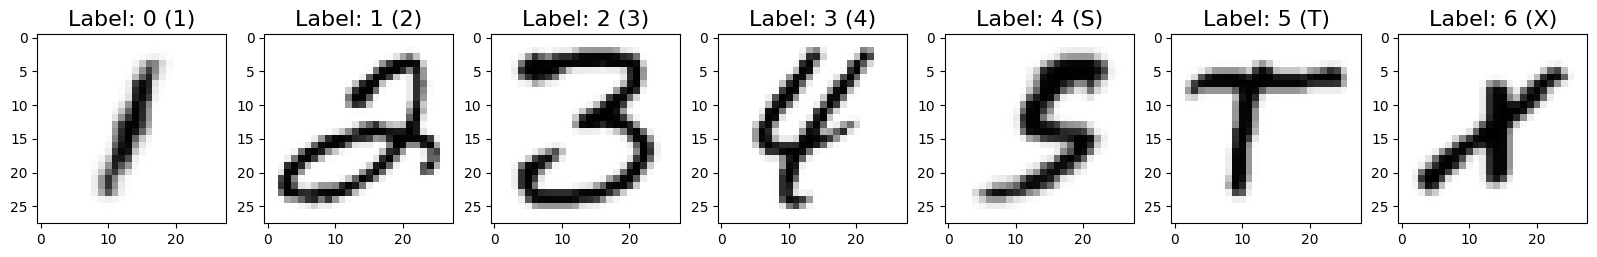

In [4]:
mapp = pd.read_csv(
    "./datasets/new_mapping.txt", delimiter=" ", index_col=0, header=None, squeeze=True
)
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap="Greys")
  label=("Label: {}".format(i) + ' (' + chr(mapp[i])+')')
  ax[i].set_title(label, fontsize=16)

In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]* x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(16800, 784)
(2800, 784)


In [6]:
print(x_train.shape)
print(x_test.shape)

(16800, 28, 28)
(2800, 28, 28)


In [ ]:
model  = keras.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

In [ ]:
batch_size = 128
epochs = 16

#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[keras.metrics.Recall()])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#history = model.fit(x_train, train_y_library, batch_size=batch_size, epochs=epochs, validation_data=(x_test,test_y_library))
history_library = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test))

In [11]:
batch_size = 128
epochs = 16
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_library = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/16
132/132 [==============================] - 42s 278ms/step - loss: 0.2932 - accuracy: 0.9103 - val_loss: 4.4114 - val_accuracy: 0.1429
Epoch 2/16
132/132 [==============================] - 36s 275ms/step - loss: 0.0674 - accuracy: 0.9805 - val_loss: 1.5919 - val_accuracy: 0.5418
Epoch 3/16
132/132 [==============================] - 30s 224ms/step - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.2901 - val_accuracy: 0.9089
Epoch 4/16
132/132 [==============================] - 33s 254ms/step - loss: 0.0319 - accuracy: 0.9907 - val_loss: 0.0660 - val_accuracy: 0.9789
Epoch 5/16
132/132 [==============================] - 29s 219ms/step - loss: 0.0268 - accuracy: 0.9910 - val_loss: 0.0439 - val_accuracy: 0.9896
Epoch 6/16
132/132 [==============================] - 29s 218ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0371 - val_accuracy: 0.9918
Epoch 7/16
132/132 [==============================] - 29s 217ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0424 - val_ac

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04092692211270332
Test accuracy: 0.9928571581840515


In [13]:
history_library.history

{'loss': [0.2932099997997284,
  0.06737945228815079,
  0.04313430190086365,
  0.0319434218108654,
  0.02675250545144081,
  0.024395780637860298,
  0.020864436402916908,
  0.016536718234419823,
  0.016118409112095833,
  0.014940526336431503,
  0.017787732183933258,
  0.012285352684557438,
  0.011459648609161377,
  0.011792389675974846,
  0.008091004565358162,
  0.00912567786872387],
 'accuracy': [0.9102976322174072,
  0.9805356860160828,
  0.9864881038665771,
  0.9907143115997314,
  0.9909523725509644,
  0.9921428561210632,
  0.9932737946510315,
  0.9950595498085022,
  0.9947023987770081,
  0.9948809742927551,
  0.9941071271896362,
  0.9960119128227234,
  0.9963690638542175,
  0.9963690638542175,
  0.9972618818283081,
  0.9969047904014587],
 'val_loss': [4.411408424377441,
  1.5919102430343628,
  0.29006797075271606,
  0.0660400316119194,
  0.04385378956794739,
  0.037124261260032654,
  0.042418088763952255,
  0.03137711063027382,
  0.030426276847720146,
  0.0432758703827858,
  0.044408

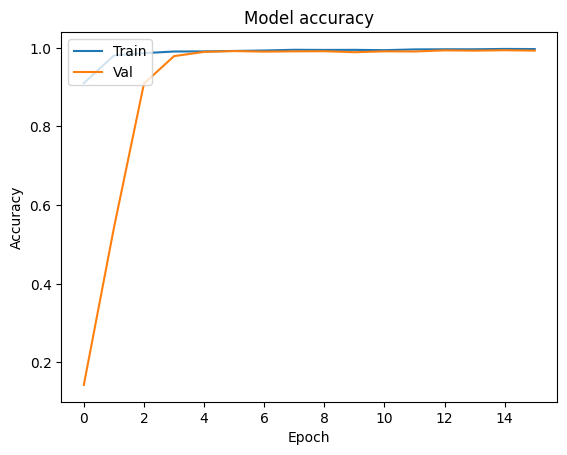

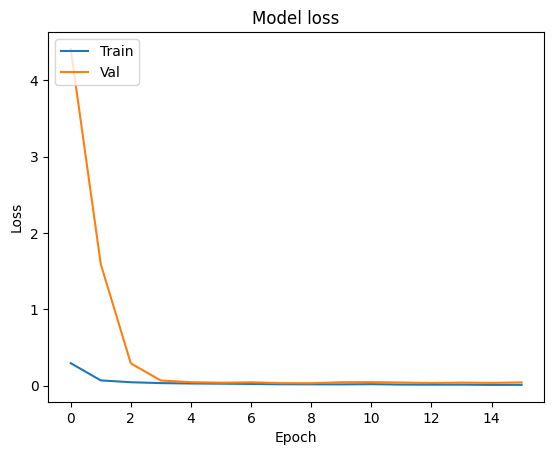

In [14]:
# Plot training & validation accuracy values
plt.plot(history_library.history['accuracy'])
plt.plot(history_library.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_library.history['loss'])
plt.plot(history_library.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [56]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

88/88 [==============================] - 2s 20ms/step
[[1.27856248e-09 7.21514404e-09 1.74449517e-11 ... 4.16663318e-12
  1.51907618e-11 1.00000000e+00]
 [4.36659882e-08 3.66383475e-08 9.99999046e-01 ... 1.85402428e-07
  7.06975698e-07 1.08776874e-07]
 [1.15893632e-08 1.00000000e+00 5.85971410e-11 ... 6.69434341e-10
  1.33720790e-09 3.75588116e-10]
 ...
 [2.34441131e-07 1.55111159e-08 2.20944756e-07 ... 3.19722808e-08
  9.99999523e-01 5.70654679e-09]
 [1.00000000e+00 2.27945796e-09 6.15127060e-10 ... 1.55938551e-08
  3.72554609e-09 1.33876976e-09]
 [2.00390787e-06 1.85404801e-07 2.14687566e-06 ... 2.63345783e-07
  9.52137198e-05 9.99898434e-01]]
[6 2 1 ... 5 0 6]


(28, 28)


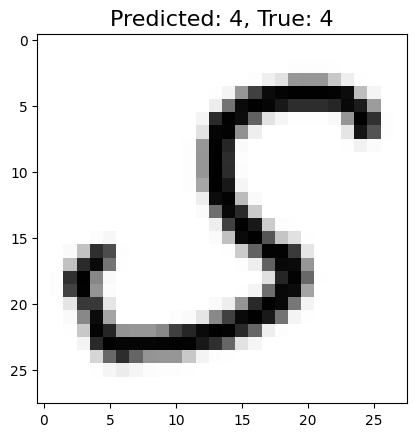

In [44]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample, cmap='Greys')

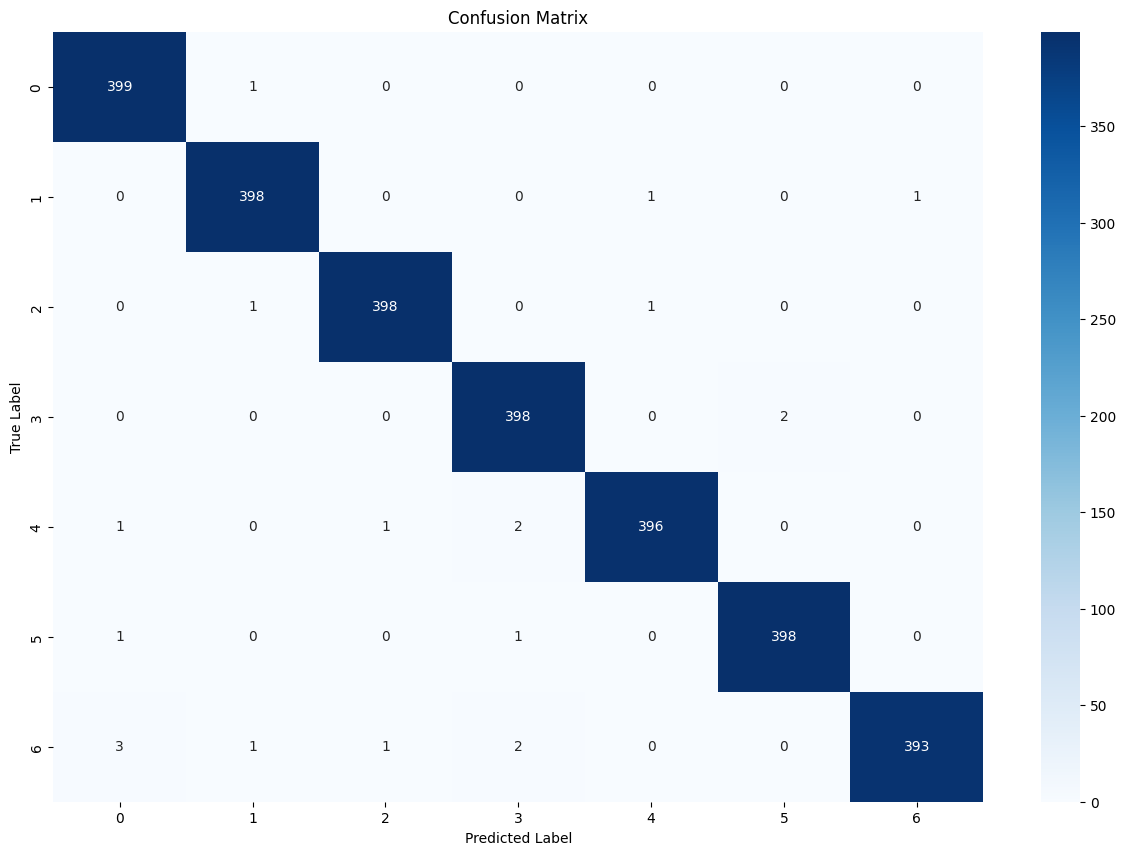

In [20]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

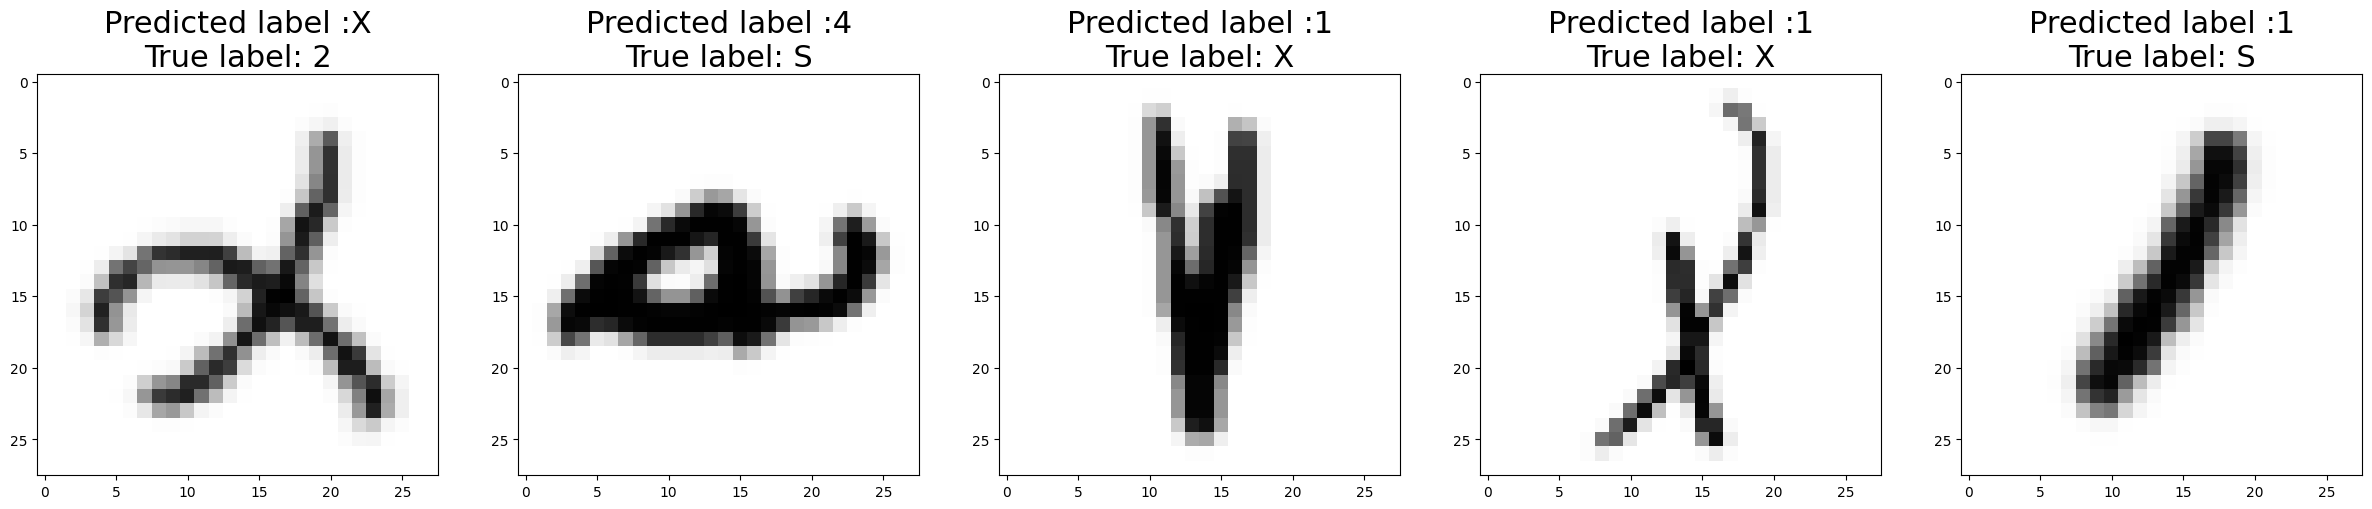

In [21]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx]
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='Greys')
  label=("Predicted label :"+ chr(mapp[y_p]) + '\nTrue label: ' + chr(mapp[y_t]))
  ax[i].set_title(label, fontsize=22)

In [22]:
model.save('./models/model.h5')

In [61]:
import cv2
from tensorflow import expand_dims

(28, 28)


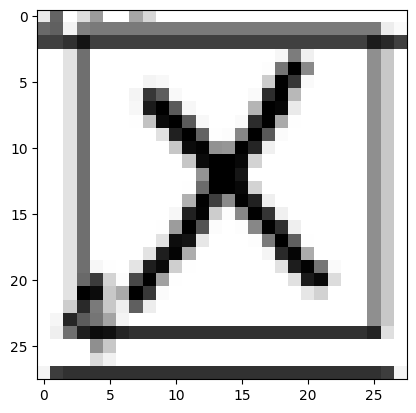

1/1 [==============================] - 0s 186ms/step
X


In [75]:
pathImage = "./test/8.png"
#pathImage = "./img/maze_5.jpg"
# load the example image
img = cv2.imread(pathImage, 0)
img = cv2.bitwise_not(img)
img = img.astype("float32")/255


print(img.shape)
plt.imshow(img, cmap='Greys')
plt.show()
img = expand_dims(img, axis=0)
predictions = model.predict(img)
classIndex = np.argmax(predictions, axis=-1)
print(chr(mapp[classIndex[0]]))
